In [19]:
import pandas as pd
from datetime import datetime, timedelta

In [39]:
t = None
def strptime(x):
    try:
        t = datetime.strptime(x, "%H:%M:%S")
    except ValueError:
        t = datetime.strptime(x, "%H:%M:%S.%f")
    return timedelta(seconds=t.second, milliseconds=t.microsecond/1000).total_seconds()

df = pd.read_csv('data.csv', delimiter='|')
df.time = df.time.map(strptime)
df

,permutation,time
0,"(0, 1, 2, 3, 4)",13.826996
1,"(0, 1, 2, 3, 4)",14.719000
2,"(0, 1, 2, 3, 4)",15.049000
3,"(0, 1, 2, 3, 4)",15.058002
4,"(0, 1, 2, 3, 4)",15.136001
...,...,...
2395,"(4, 3, 2, 1, 0)",22.977000
2396,"(4, 3, 2, 1, 0)",22.993001
2397,"(4, 3, 2, 1, 0)",22.964003
2398,"(4, 3, 2, 1, 0)",23.052001


<Axes: >

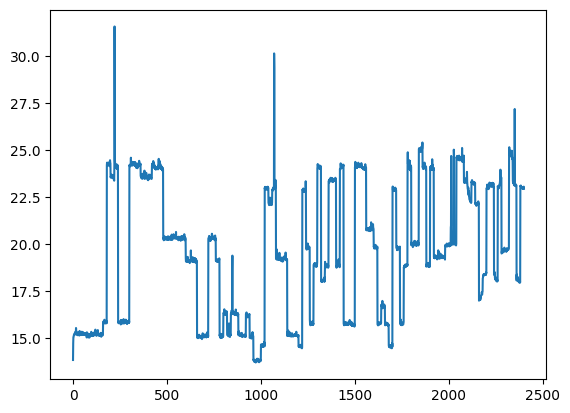

In [44]:
df.time.plot()

In [46]:
df.groupby('permutation').mean().sort_values(by='time')

,time
permutation,
"(2, 0, 1, 3, 4)",13.789752
"(2, 0, 1, 4, 3)",13.796209
"(3, 2, 0, 1, 4)",14.551613
"(2, 3, 0, 1, 4)",14.555042
"(2, 0, 3, 1, 4)",14.597333
...,...
"(4, 1, 0, 3, 2)",24.527808
"(4, 1, 0, 2, 3)",24.564977
"(0, 2, 4, 3, 1)",24.676228
